In [1]:
import numpy as np;
import math;

A = np.zeros([20,3]);
b = np.zeros([20,1]);

counter = 0; #Counter to avoid reading header
A_counter = 0; #Counter to entry x values in Matrix

with open("data2.dat", "r") as file:
    for line in file:
        if(counter > 1):
            data_points = line.strip().split(" ");
            x = float(data_points[0]);
            y = float(data_points[-1]);
            
            #Assign value of y = xˆ2 - x in Matrix
            A[A_counter, 0] = math.pow(x, 2);
            A[A_counter, 1] = x;
            A[A_counter, 2] = 1;
            
            #Assign y values in b Matrix
            b[A_counter, 0] = y;
            
            #Add one to the A_counter
            A_counter = A_counter + 1;
            
        counter = counter +1;
file.close();


### Find the the Unknown with SVD

In [3]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as spla
import math

max_R_C = 0
rows, cols = A.shape
if rows <= cols:
    max_R_C = rows;
else:
    max_R_C = cols;
    
U, sigma, VT = la.svd(A)

Sigma = np.zeros(A.shape)
Sigma[:max_R_C,:max_R_C] = np.diag(sigma)

Sigma_pinv = np.zeros(A.shape).T
Sigma_pinv[:max_R_C,:max_R_C] = np.diag(1/sigma[:max_R_C])
Sigma_pinv.round(max_R_C)

x_svd = VT.T.dot(Sigma_pinv).dot(U.T).dot(b)

print("x_svd: \n", x_svd);

x_svd: 
 [[ 1.03096967]
 [-0.97167661]
 [-0.02153287]]


### plotting the data points


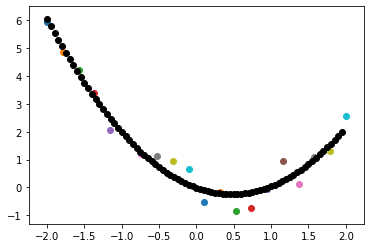

In [5]:
import matplotlib.pyplot as plt;

counter = 0; #Counter to avoid reading header
A_counter = 0; #Counter to entry x values in Matrix

with open("data2.dat", "r") as file:
    for line in file:
        if(counter > 1):
            data_points = line.strip().split(" ");
            x = float(data_points[0]);
            y = float(data_points[-1]);
            
            #y = xˆ2 -x 
            plt.scatter(x,y);
            
            #Add one to the A_counter
            A_counter = A_counter + 1;
            
        counter = counter +1;
file.close();

#I act as x points, it increase by 0.05 to be showed as curve line
i = -2;
while(i <= 2):
    #y = c2xˆ2 + c1x + c0
    #Plug in the values of c1, c2, c3
    y = (1.03096967* math.pow(i,2)) + (-0.97167661 * i) - 0.02153287;
    
    plt.scatter(i, y, color= "black");
    i += 0.05;

plt.show();

### Calculate the residual

In [6]:
counter = 0;
residual = 0;
with open("data2.dat", "r") as file:
    for line in file:
        if(counter > 1):
            data_points = line.strip().split(" ");
            
            #Acutal values
            x = float(data_points[0]);
            y = float(data_points[-1]);
            
            #predicted values(regression line), Model = c1xˆ2 + c2x + c3
            predicted_y = (1.03096967* math.pow(x,2)) + (-0.97167661 * x) + (- 0.02153287);
            
            #Calculate the residual rˆ2 = Sum(yi - f(xi))ˆ2
            r = y - predicted_y;
            residual += math.pow(r,2);
            
        counter = counter +1;
file.close();

print("Sum of residual: \n", residual)

Sum of residual: 
 2.858904508696579


### Zero the smallest singular value and re-compute condition number and the coefficients.

In [61]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as spla
import math

max_R_C = 0
rows, cols = A.shape
if rows <= cols:
    max_R_C = rows;
else:
    max_R_C = cols;
    
U, sigma, VT = la.svd(A)

#zero the smallest singular value, the smallest value is in index 2
sigma[2] = 0;


Sigma = np.zeros(A.shape)
Sigma[:max_R_C,:max_R_C] = np.diag(sigma)

#In oreder to avoid deviding by zero, max_R_C = max_R_C - 1
Sigma_pinv = np.zeros(A.shape).T
Sigma_pinv[:max_R_C-1,:max_R_C-1] = np.diag(1/sigma[:max_R_C-1])
Sigma_pinv.round(max_R_C-1)

x_svd = VT.T.dot(Sigma_pinv).dot(U.T).dot(b)

print(x_svd);

[[ 0.86909425]
 [-0.97167661]
 [ 0.36446805]]


### Calculate the new residual.

In [8]:
counter = 0;
residual = 0;
with open("data2.dat", "r") as file:
    for line in file:
        if(counter > 1):
            data_points = line.strip().split(" ");
            
            #Acutal values
            x = float(data_points[0]);
            y = float(data_points[-1]);
            
            #predicted values(regression line), Model = c1xˆ2 + c2x + c3
            predicted_y = (0.86909425* math.pow(x,2)) + (-0.97167661 * x) + 0.36446805;
            
            #Calculate the residual rˆ2 = Sum(yi - f(xi))ˆ2
            r = y - predicted_y;
            residual += math.pow(r,2);
            
        counter = counter +1;
file.close();

print("Sum of new residual: \n", residual)

Sum of new residual: 
 4.197408188042315


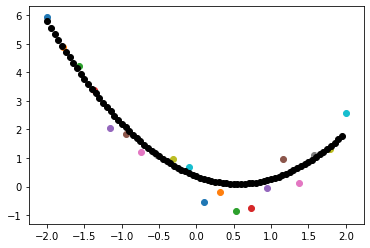

In [7]:
import matplotlib.pyplot as plt;

counter = 0; #Counter to avoid reading header
A_counter = 0; #Counter to entry x values in Matrix

with open("data2.dat", "r") as file:
    for line in file:
        if(counter > 1):
            data_points = line.strip().split(" ");
            x = float(data_points[0]);
            y = float(data_points[-1]);
            
            #y = xˆ2 -x 
            plt.scatter(x,y);
            
            #Add one to the A_counter
            A_counter = A_counter + 1;
            
        counter = counter +1;
file.close();

#I act as x points, it increase by 0.05 to be showed as curve line
i = -2;
while(i <= 2):
    #y = c2xˆ2 + c1x + c0
    #Plug in the values of c1, c2, c3
    y = (0.86909425* math.pow(i,2)) + (-0.97167661 * i) + 0.36446805;
    
    plt.scatter(i, y, color= "black");
    i += 0.05;

plt.show();

In [ ]:
#Note: In this example setting the smallest singular value to zeto has no advantage, even it has disadvantage
#beause the residual increased, the regression line doesn't fit well.  